FASHION MNIST CLOTHING CLASSIFICATION


BY:
K NANDITHA


In [2]:
!pip install -U tensorflow_datasets #installing the tensorflow datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
#import all the required libraries 
import tensorflow as tf 
import tensorflow_datasets as tfds
import math
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto
tqdm.tqdm=tqdm.auto.tqdm
print(tf.__version__)


2.12.0


In [4]:
#splitting the data into train_dataset and test_dataset
dataset,metadata=tfds.load("fashion_mnist",as_supervised=True,with_info=True)
train_dataset,test_dataset=dataset["train"],dataset["test"]


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteI6G2UF/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteI6G2UF/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [8]:
#explore the dataset 
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [6]:
num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples

In [7]:
print(num_train_examples)
print(num_test_examples)

60000
10000


Preprocess the data

In [9]:
def normalize(images,labels):
  images=tf.cast(images,tf.float32)
  images/=255
  return images,labels

In [11]:
#normalize the images using the above definied function
train_dataset=train_dataset.map(normalize)
test_dataset=test_dataset.map(normalize)

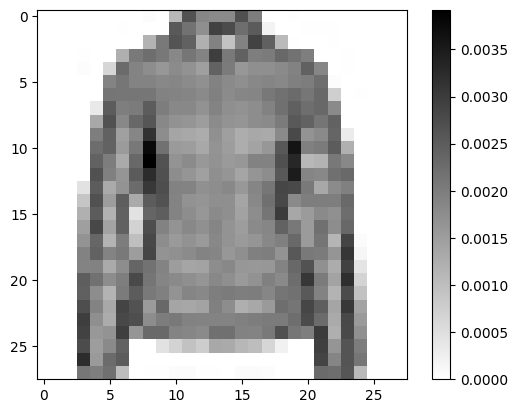

In [12]:
for image,label in test_dataset.take(1):
  break
  image=image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

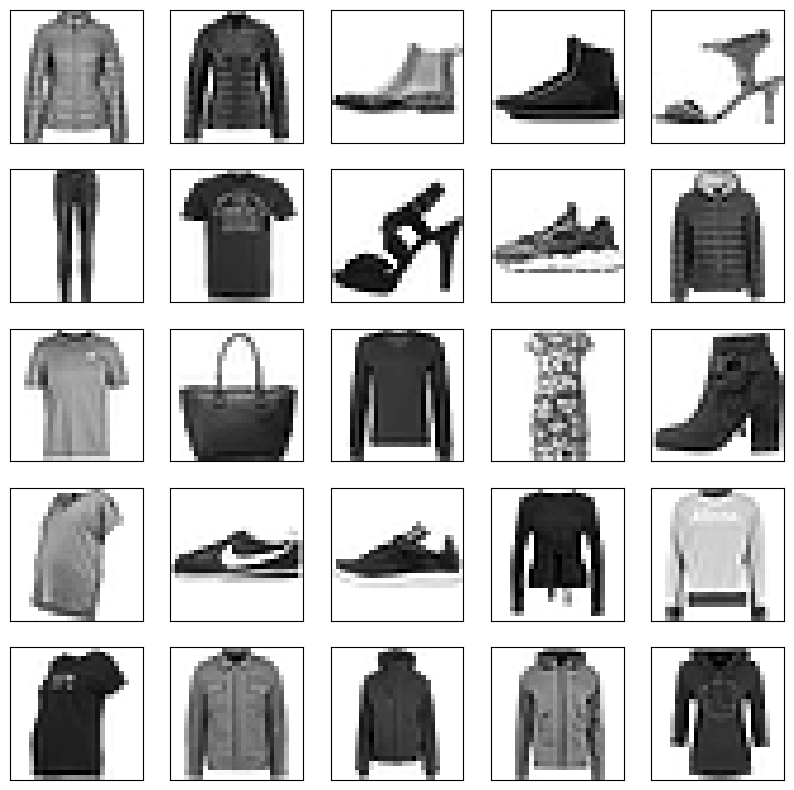

In [13]:
plt.figure(figsize=(10,10))
i=0
for (image,label) in test_dataset.take(25):
  image=image.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image,cmap=plt.cm.binary)
  i+=1
plt.show()


In [ ]:
#model=tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),tf.keras.layers.Dense(128,activation=tf.nn.relu),tf.keras.layers.Dense(10,activation=tf.nn.softmax)])

Define the model

In [15]:
model = tf.keras.models.Sequential()


Add the layers to the model

In [16]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))
model.build(input_shape=[None, 28, 28])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [18]:
#compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [19]:
BS=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BS)
test_dataset=test_dataset.batch(BS)


In [20]:
#fitting the model
model.fit(train_dataset,epochs=10,steps_per_epoch=math.ceil(num_train_examples/BS))

Epoch 1/10
1875/1875 [==============================] - 16s 5ms/step - loss: 0.8086 - accuracy: 0.7049
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.5267 - accuracy: 0.8099
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4561 - accuracy: 0.8366
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4253 - accuracy: 0.8462
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4048 - accuracy: 0.8535
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3838 - accuracy: 0.8612
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3650 - accuracy: 0.8664
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3510 - accuracy: 0.8720
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3456 - accuracy: 0.8743
Epoch 10/10
1875/1875 [==============================] - 10s 5ms/step - loss

In [21]:
test_loss,test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))

313/313 [==============================] - 1s 4ms/step - loss: 0.3784 - accuracy: 0.8634


In [22]:
print(test_accuracy)

0.8633999824523926


**Thus, the accuracy was obtained to be 86.33%**

Make predictions and verify them

In [23]:
for test_images,test_labels in test_dataset.take(1):
  test_images=test_images.numpy()
  test_labels=test_labels.numpy()
  predictions=model.predict(test_images)

1/1 [==============================] - 0s 76ms/step


In [24]:
predictions.shape

(32, 10)

In [25]:
predictions[0]

array([6.5672299e-05, 8.6918066e-05, 1.8069906e-02, 1.6483875e-05,
       9.2057508e-01, 2.7214764e-07, 6.0985412e-02, 6.8474071e-10,
       2.0006366e-04, 1.9736818e-07], dtype=float32)

In [26]:
np.argmax(predictions[0])

4

In [27]:
test_labels[0]

4

In [28]:
#verify the predictions
class_names = ['T_shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
#sample
y_predict = class_names[np.argmax(predictions[3])]
y_predict


'Ankle boot'

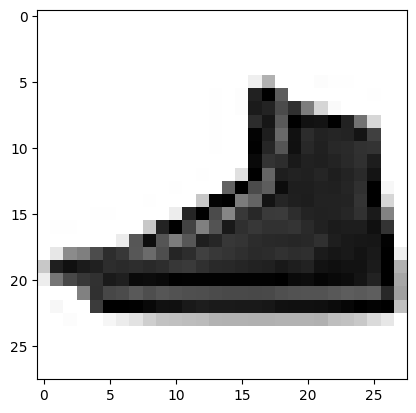

In [29]:
img = test_images[3]
plt.imshow(img, cmap='Greys')


In [32]:
 y_predict=class_names[np.argmax(predictions[6])]

In [33]:
y_predict

'T_shirt/top'

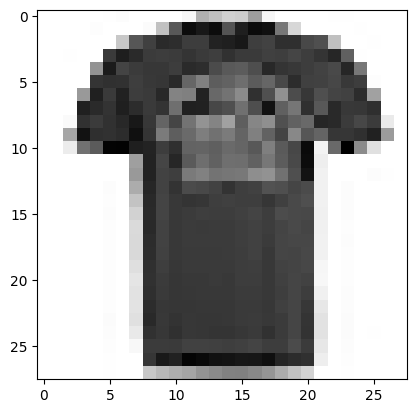

In [34]:
img = test_images[6]
plt.imshow(img, cmap='Greys')
